In [1]:
import numpy as np
x = np.array([[1., 2., 3.], [4., 5., 6.]])
y = np.array([[6., 23.], [-1, 7], [8, 9]])
x
y
x.dot(y)

array([[ 28.,  64.],
       [ 67., 181.]])

In [2]:
np.dot(x, y)

array([[ 28.,  64.],
       [ 67., 181.]])

In [3]:
x @ np.ones(3)

array([ 6., 15.])

In [5]:
rng = np.random.default_rng(seed=12345)
data = rng.standard_normal((2, 3))

In [6]:
from numpy.linalg import inv, qr
X = rng.standard_normal((5, 5))
mat = X.T @ X
inv(mat)
mat @ inv(mat)

array([[ 1.00000000e+00, -1.50214970e-15,  8.64950872e-19,
        -1.83818412e-16,  9.27601060e-17],
       [-3.76921875e-15,  1.00000000e+00, -1.41424158e-15,
        -7.81772910e-16, -2.70561654e-16],
       [ 6.87023650e-15, -1.56852203e-15,  1.00000000e+00,
         6.78359303e-16,  3.75969064e-16],
       [ 6.57588292e-15, -2.77682201e-15,  2.88697972e-15,
         1.00000000e+00, -3.14790962e-16],
       [ 2.83540194e-15, -4.18173722e-15,  2.57167704e-15,
        -4.75727373e-16,  1.00000000e+00]])

In [11]:
import matplotlib.pyplot as plt
import random
position = 0
walk = [position]
nsteps = 1000
for _ in range(nsteps):
    step = 1 if random.randint(0, 1) else -1
    position += step
    walk.append(position)

In [12]:
plt.figure()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

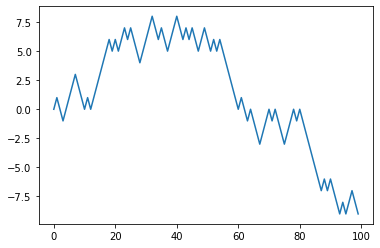

In [13]:
plt.plot(walk[:100])

In [14]:
nsteps = 1000
rng = np.random.default_rng(seed=12345)  # fresh random generator
draws = rng.integers(0, 2, size=nsteps)
steps = np.where(draws == 0, 1, -1)
walk = steps.cumsum()

In [15]:
walk.min()
walk.max()

50

In [16]:
(np.abs(walk) >= 10).argmax()

155

In [17]:
nwalks = 5000
nsteps = 1000
draws = rng.integers(0, 2, size=(nwalks, nsteps)) # 0 or 1
steps = np.where(draws > 0, 1, -1)
walks = steps.cumsum(axis=1)
walks

array([[  1,   2,   3, ...,  22,  23,  22],
       [  1,   0,  -1, ..., -50, -49, -48],
       [  1,   2,   3, ...,  50,  49,  48],
       ...,
       [ -1,  -2,  -1, ..., -10,  -9, -10],
       [ -1,  -2,  -3, ...,   8,   9,   8],
       [ -1,   0,   1, ...,  -4,  -3,  -2]])

In [18]:
walks.max()
walks.min()

-120

In [19]:
hits30 = (np.abs(walks) >= 30).any(axis=1)
hits30
hits30.sum() # Number that hit 30 or -30

3395

In [20]:
crossing_times = (np.abs(walks[hits30]) >= 30).argmax(axis=1)
crossing_times

array([201, 491, 283, ..., 219, 259, 541])

In [21]:
draws = 0.25 * rng.standard_normal((nwalks, nsteps))